# 獲得ユーザーの質に差がある？

- 「仕事ではじめる機械学習」(オライリー・ジャパン発行 ISBN978-4-87311-825-3)
- p117- 6章 効果検証 6.2節 仮説検定の仕組み

平均に差がある2群の有意差検定において、標本サイズによる結果の変化を確かめる。

In [1]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
from statsmodels.stats.proportion import proportion_confint as p_con

In [2]:
max_size = 200000 # 最大サンプル数
init_size = 1000 # 最小サンプル数
step_size = 1000 # n件ずつ標本サイズを増やして検定を行う
sample_sizes = np.arange(init_size, max_size, step_size) # 試行用の数列

p_a = 0.080 # 標本Aの確率
p_b = 0.085 # 標本Aの確率

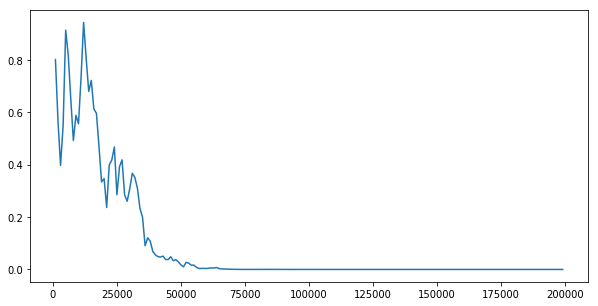

In [3]:
# ベルヌーイ分布のランダムな標本を作成する
a = scipy.stats.bernoulli.rvs(p_a, size=max_size)
b = scipy.stats.bernoulli.rvs(p_b, size=max_size)

# 標本数ごとのp値を取得する
p_values = list(map(lambda x: scipy.stats.ttest_ind(a[:x], b[:x])[1], sample_sizes))

# 折れ線グラフを表示する
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, p_values)

CVR 8.0% と 8.5% の施策でA/Bテストをするなら、標本数は10万件あれば十分と言えそう。

In [4]:
# 信頼区間を求める
a_lower, a_upper = p_con(sum(a), len(a), alpha=0.05, method='wilson')
b_lower, b_upper = p_con(sum(b), len(b), alpha=0.05, method='wilson')

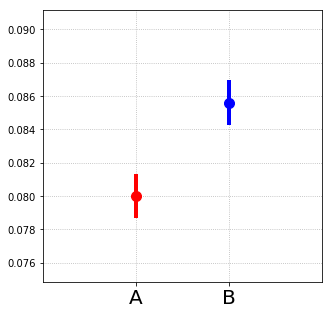

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(1, np.mean(a), 'ro', markersize=10)
plt.plot(2, np.mean(b), 'bo', markersize=10)
plt.plot([1, 1], [a_lower, a_upper], 'r-', linewidth=4)
plt.plot([2, 2], [b_lower, b_upper], 'b-', linewidth=4)
plt.xlim(0, 3)
plt.ylim(min(a_lower, b_lower) * 0.95, max(a_upper, b_upper) * 1.05)
plt.grid(linestyle=':')
plt.xticks([1, 2], ['A', 'B'], fontsize=20)
plt.show()

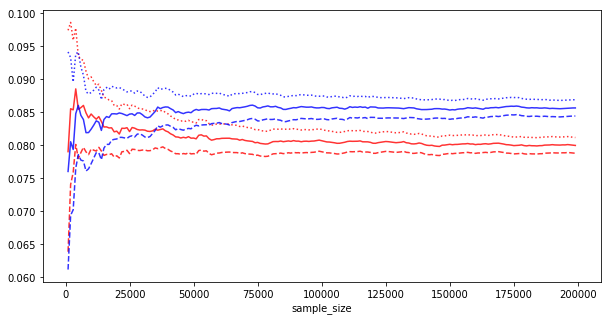

In [6]:
# サンプル数を変えながら信頼区間をプロットする
df = pd.DataFrame(list(map(lambda x:
    (x, a[:x].mean(), b[:x].mean())
    + p_con(sum(a[:x]), len(a[:x]), alpha=0.05, method='wilson')
    + p_con(sum(b[:x]), len(b[:x]), alpha=0.05, method='wilson'), sample_sizes)))

df.columns = ['sample_size', 'a_mean', 'b_mean', 'a_lower', 'a_upper', 'b_lower', 'b_upper']

df.plot(
    x='sample_size'
    , y=['a_mean', 'b_mean', 'a_lower', 'a_upper', 'b_lower', 'b_upper']
    , style=['r-', 'b-', 'r--', 'r:', 'b--', 'b:']
    , alpha=0.8
    , legend=False
    , figsize=(10,5))

CVR 8.0% と 8.5% の施策において、5%信頼区間で評価するなら標本数はやはり10万件あれば十分と言えそう。